First Steps

**First steps:**
We load the data that's already split into train-val-test.

In [51]:
import os
from PIL import Image

In [52]:
import kagglehub
import tensorflow as tf

In [53]:
#Train set

train_set_path = '/kaggle/input/train-val-test-2/train_val_test/trash-type-image-dataset-tvt/train'

# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(train_set_path)

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set()

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(train_set_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entire dataset have the same dimensions 
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

metal folder contains 380 images.
glass folder contains 471 images.
paper folder contains 564 images.
trash folder contains 107 images.
cardboard folder contains 373 images.
plastic folder contains 452 images.

All images in the dataset have the same dimensions: 512x384 with 3 color channels.


In [54]:
#Validation set

val_set_path = '/kaggle/input/train-val-test-2/train_val_test/trash-type-image-dataset-tvt/val'

# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(val_set_path)

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set()

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(val_set_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entire dataset have the same dimensions 
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

metal folder contains 10 images.
glass folder contains 10 images.
paper folder contains 10 images.
trash folder contains 10 images.
cardboard folder contains 10 images.
plastic folder contains 10 images.

All images in the dataset have the same dimensions: 512x384 with 3 color channels.


In [55]:
# Test set

test_set_path = '/kaggle/input/train-val-test-2/train_val_test/trash-type-image-dataset-tvt/test'

# Retrieve the names of all folders (representing trash types) within the dataset directory
garbage_types = os.listdir(test_set_path)

# Set to store unique image dimensions for the entire dataset
all_dimensions_set = set()

# Iterate over each trash type (folder) to process images
for garbage_type in garbage_types:
    folder_path = os.path.join(test_set_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Display the count of images in the current folder
        num_images = len(image_files)
        print(f"{garbage_type} folder contains {num_images} images.")
        
        # Loop over each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                # Extract the width, height, and channels (color depth) of the image and add to the dimensions set
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))
                
# Determine if all images in the entire dataset have the same dimensions 
if len(all_dimensions_set) == 1: 
    width, height, channel = all_dimensions_set.pop()
    print(f"\nAll images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\nThe images in the dataset have different dimensions or color channels.")

metal folder contains 20 images.
glass folder contains 20 images.
paper folder contains 20 images.
trash folder contains 20 images.
cardboard folder contains 20 images.
plastic folder contains 20 images.

All images in the dataset have the same dimensions: 512x384 with 3 color channels.


In [56]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

**Let's look at a few example pics**

In [57]:
img = load_img(f"{train_set_path}/cardboard/cardboard_001.jpg")

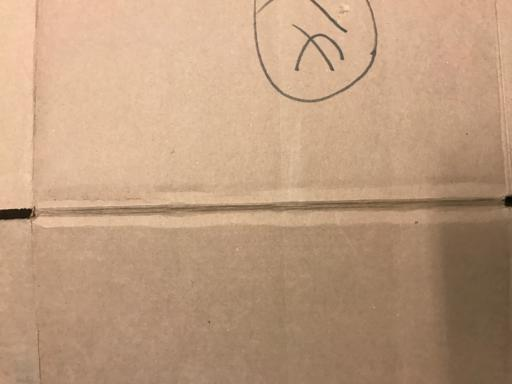

In [58]:
img

In [59]:
img = load_img(f"{train_set_path}/trash/trash_005.jpg")

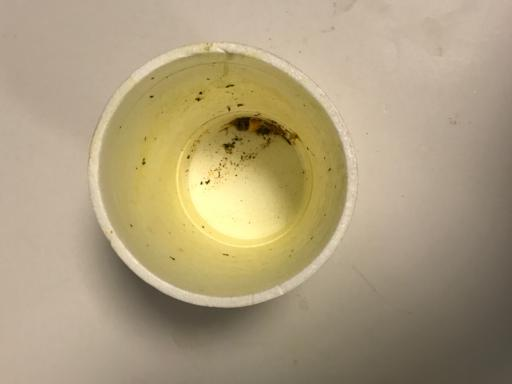

In [60]:
img

Let's look at a few random images per class from the train set:

In [61]:
from random import sample
import pandas as pd

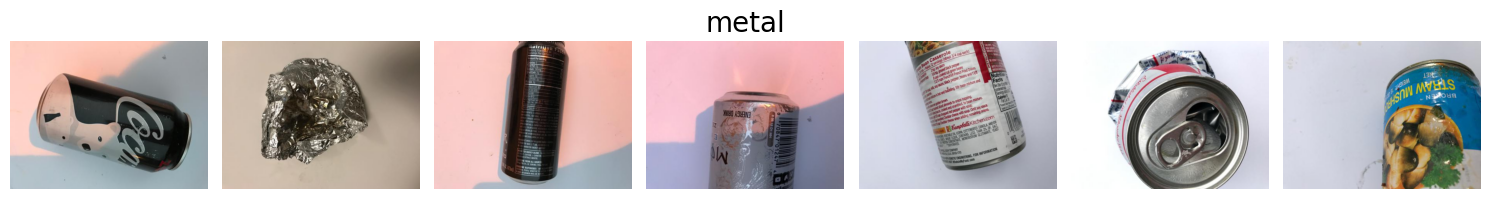

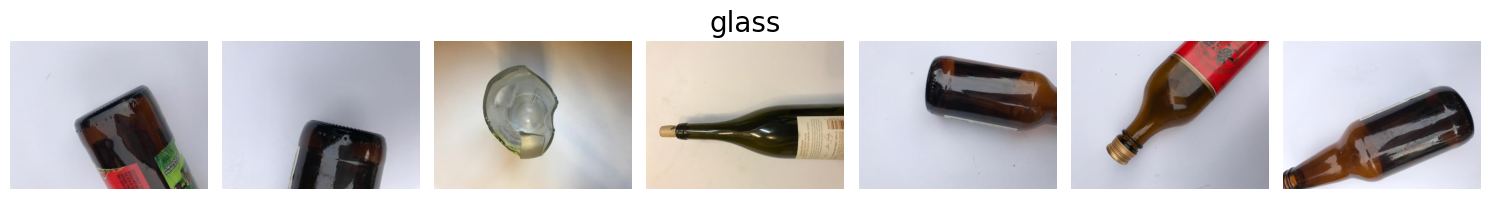

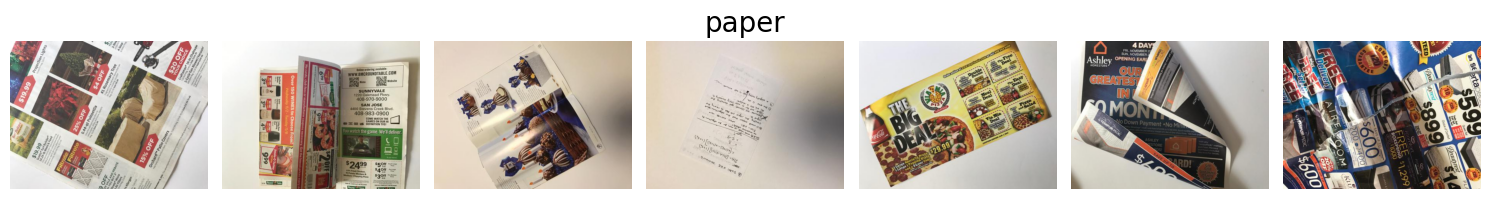

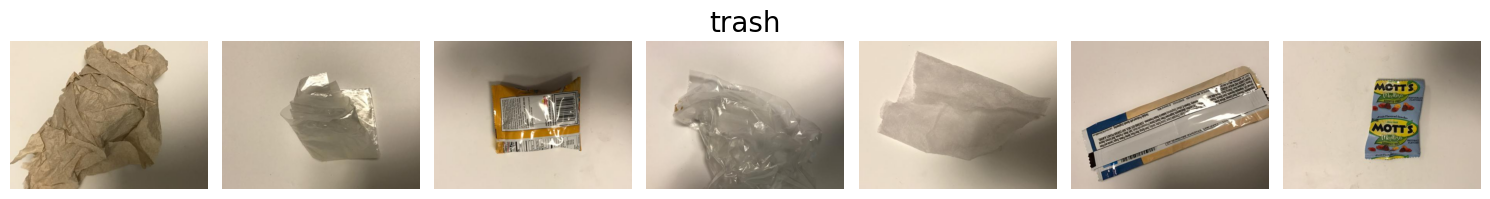

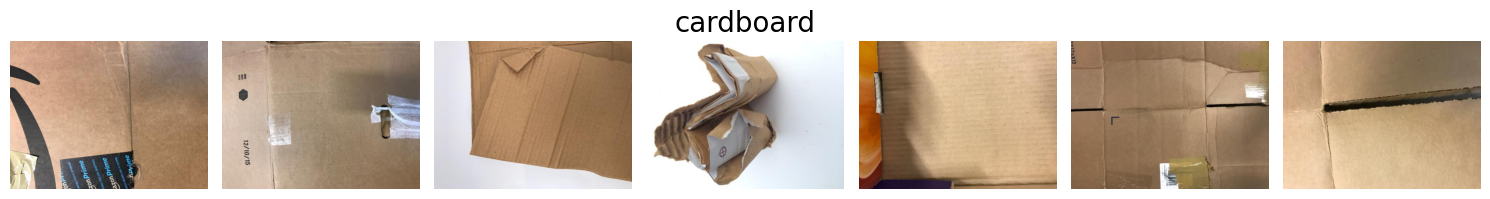

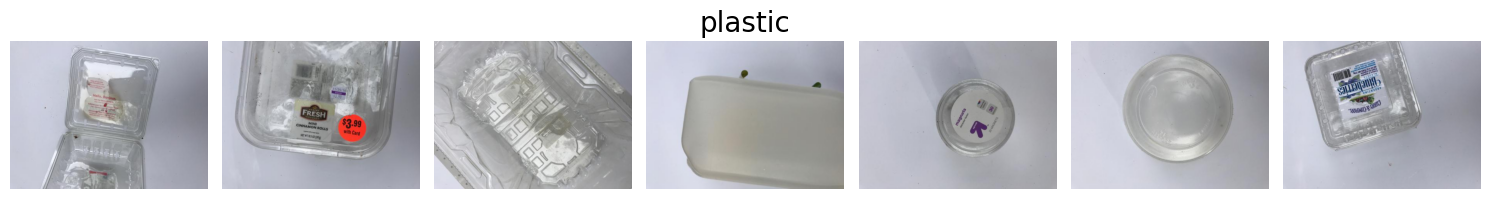

In [62]:
# Iterate over each trash type (folder) to display images
for garbage_type in garbage_types:
    folder_path = os.path.join(train_set_path, garbage_type)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select 7 random images
        image_files = sample(image_files,7)
        
        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(garbage_type, fontsize=20, y=1.03)
        plt.show()

**In order to gain an overview over our class imbalance we create dataframes from the folders**

In [63]:
# Initialize empty lists to store image file paths and their respective labels
data = []
train = []
test = []
val = []

# Loop through each train-val-test folder and then garbage type and collect its images' file paths

dataset_path = '/kaggle/input/train-val-test-2/train_val_test/trash-type-image-dataset-tvt'

data_set_types = os.listdir(dataset_path)

for data_set in data_set_types:

    folder_path = os.path.join(dataset_path, data_set)
    if os.path.isdir(folder_path):

        garbage_types = os.listdir(folder_path)
        for garbage_type in garbage_types:
            for file in os.listdir(os.path.join(folder_path, garbage_type)):
            # Append the image file path and its trash type (as a label) to the data list
                data.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                if data_set == 'train':
                    train.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                elif data_set == 'test':
                    test.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))
                elif data_set == 'val':
                    val.append((os.path.join(dataset_path, folder_path, garbage_type, file), garbage_type))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])
train_df = pd.DataFrame(train, columns=['filepath', 'label'])
test_df = pd.DataFrame(test, columns=['filepath', 'label'])
val_df = pd.DataFrame(val, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.head()

,filepath,label
0,/kaggle/input/train-val-test-2/train_val_test/...,metal
1,/kaggle/input/train-val-test-2/train_val_test/...,metal
2,/kaggle/input/train-val-test-2/train_val_test/...,metal
3,/kaggle/input/train-val-test-2/train_val_test/...,metal
4,/kaggle/input/train-val-test-2/train_val_test/...,metal


In [64]:
df.filepath[2526]

'/kaggle/input/train-val-test-2/train_val_test/trash-type-image-dataset-tvt/train/plastic/plastic_389.jpg'

In [65]:
df.shape

(2527, 2)

In [66]:
train_df.shape

(2347, 2)

In [67]:
test_df.shape


(120, 2)

In [68]:
val_df.shape

(60, 2)

We use image_dataset_from_directory to create datasets that the data can be loaded in batches from during training

In [69]:
from tensorflow.keras.utils import image_dataset_from_directory

In [211]:
batch_size = 32

## Create image datasets from directory: 

train_ds = image_dataset_from_directory(
    train_set_path,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(384, 384),
    batch_size=batch_size)

# We define a second one for the val data

val_ds = image_dataset_from_directory(
    val_set_path,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(384, 384),
    batch_size=batch_size)

# We define a third one for the test data

test_ds = image_dataset_from_directory(
    test_set_path,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(384, 384),
    batch_size=batch_size,
    shuffle=False)

Found 2347 files belonging to 6 classes.
Found 60 files belonging to 6 classes.
Found 120 files belonging to 6 classes.


In [71]:
weight_trash = 2347/(6*107)
weight_trash

3.655763239875389

In [72]:
weight_cardboard = 2347/(6*373)
weight_cardboard

1.048704200178731

In [73]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 384, 384, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [74]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

Let's look at class distribution:

In [75]:
# 1. Class distribution in the entire dataset
overall_distribution = df['label'].value_counts(normalize=True) * 100

# 2. Class distribution in the training set
train_distribution = train_df['label'].value_counts(normalize=True) * 100

# 3. Class distribution in the validation set
val_distribution = val_df['label'].value_counts(normalize=True) * 100

# 4. Class distribution in the test set
test_distribution = test_df['label'].value_counts(normalize=True) * 100



print("Class distribution in the entire dataset:\n")
print(overall_distribution.round(2))
print('-'*40)

print("\nClass distribution in the training set:\n")
print(train_distribution.round(2))
print('-'*40)

print("\nClass distribution in the validation set:\n")
print(val_distribution.round(2))

print("\nClass distribution in the test set:\n")
print(test_distribution.round(2))
print('-'*40)

Class distribution in the entire dataset:

label
paper        23.51
glass        19.83
plastic      19.07
metal        16.22
cardboard    15.95
trash         5.42
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the training set:

label
paper        24.03
glass        20.07
plastic      19.26
metal        16.19
cardboard    15.89
trash         4.56
Name: proportion, dtype: float64
----------------------------------------

Class distribution in the validation set:

label
metal        16.67
glass        16.67
paper        16.67
trash        16.67
cardboard    16.67
plastic      16.67
Name: proportion, dtype: float64

Class distribution in the test set:

label
metal        16.67
glass        16.67
paper        16.67
trash        16.67
cardboard    16.67
plastic      16.67
Name: proportion, dtype: float64
----------------------------------------


We now compute the class weights to pass onto the model so it can adjust for them. We do this differently than in the original notebook because there's an error there. 

In [76]:
from sklearn.utils.class_weight import compute_class_weight

In [77]:
class_labels = train_df['label'].unique()
class_labels

array(['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic'],
      dtype=object)

In [78]:
# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=train_df['label'])
weights

array([1.02938596, 0.83050248, 0.69355792, 3.65576324, 1.0487042 ,
       0.86541298])

In [79]:
# Convert the computed weights to a dictionary for passing to model training
class_weights = dict(zip(range(0,6), weights))
class_weights

{0: 1.0293859649122807,
 1: 0.8305024769992922,
 2: 0.6935579196217494,
 3: 3.655763239875389,
 4: 1.048704200178731,
 5: 0.8654129793510325}

In [111]:
class_dict = dict(zip(class_labels, class_weights.keys()))
class_dict

{'metal': 0, 'glass': 1, 'paper': 2, 'trash': 3, 'cardboard': 4, 'plastic': 5}

Now we're building the model. We're gonna use transfer learning with a bit of customization as in the original notebook, but we build the model in a different way and so that we can load our data the way we would like to via the batch datasets

In [80]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

In [81]:
# Augmentation and Scaling: 

#model.add(layers.Rescaling(1./255))

data_augmentation = Sequential()

data_augmentation.add(layers.RandomFlip("horizontal_and_vertical"))
data_augmentation.add(layers.RandomZoom(0.15))
data_augmentation.add(layers.RandomTranslation(0.2, 0.2))
data_augmentation.add(layers.RandomRotation(0.15))

We need to turn on the internet before loading the model: "Settings --> Turn On Internet", when working on kaggle

In [82]:
# Load the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(384, 384, 3))

# Freeze the layers up to conv4_block6_out
for layer in base_model.layers[:143]: # include the layer 142
    layer.trainable = False

In [83]:
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [84]:

inputs = layers.Input(shape=(384, 384, 3))

x = data_augmentation(inputs) # We still have our data augmentation layers
x = preprocess_input(x) # Then a preprocessing layer specifically designed for the ResNet50 including scaling
x = base_model(x) # Then our transfer learning model

# Create the new model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
pred = Dense(6, activation='softmax')(x)

# We use the keras Functional API to create our keras model

custom_resnet50_model = Model(inputs=base_model.input , outputs=pred)


In [85]:
custom_resnet50_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 384, 384, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 390, 390, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 192, 192, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 192, 192, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 192, 192, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 194, 194, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 96, 96, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 96, 96, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 96, 96, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 96, 96, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 96, 96, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 96, 96, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 96, 96, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 96, 96, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 96, 96, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,600,006 (90.03 MB)

 Trainable params: 14,988,294 (57.18 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [86]:
# Compile the model
custom_resnet50_model.compile(optimizer=Adam(learning_rate=0.0001),
                                loss='categorical_crossentropy',
                                metrics=['accuracy', 'recall', 'f1'])

In [87]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [88]:
MODEL = "custom_resnet50_model.keras"

modelCheckpoint = callbacks.ModelCheckpoint(MODEL,
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.5,
                                        patience=15,
                                        min_lr=0.00001)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       mode='min',
                                       patience=20,
                                       verbose=1,
                                       restore_best_weights=True)

In [89]:
history = custom_resnet50_model.fit(
        train_ds,
        epochs=50,
        batch_size=32,
        validation_data=val_ds,
        class_weight=class_weights,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 361ms/step - accuracy: 0.4974 - loss: 1.5936 - val_accuracy: 0.7833 - val_loss: 0.6242 - learning_rate: 1.0000e-04
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8872 - loss: 0.3094 - val_accuracy: 0.7500 - val_loss: 0.7200 - learning_rate: 1.0000e-04
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9675 - loss: 0.0990 - val_accuracy: 0.7833 - val_loss: 0.5825 - learning_rate: 1.0000e-04
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.9872 - loss: 0.0446 - val_accuracy: 0.8167 - val_loss: 0.6398 - learning_rate: 1.0000e-04
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.9949 - loss: 0.0239 - val_accuracy: 0.8167 - val_loss: 0.6270 - learning_rate: 1.0000e-04
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9974 - loss: 0.0129 - val_accuracy: 0.8333 - val_loss: 0.5096 - learning_rate: 1.0000e-04
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - acc

In [90]:
custom_resnet50_model.save('custom_resnet50_model.keras')

In [91]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

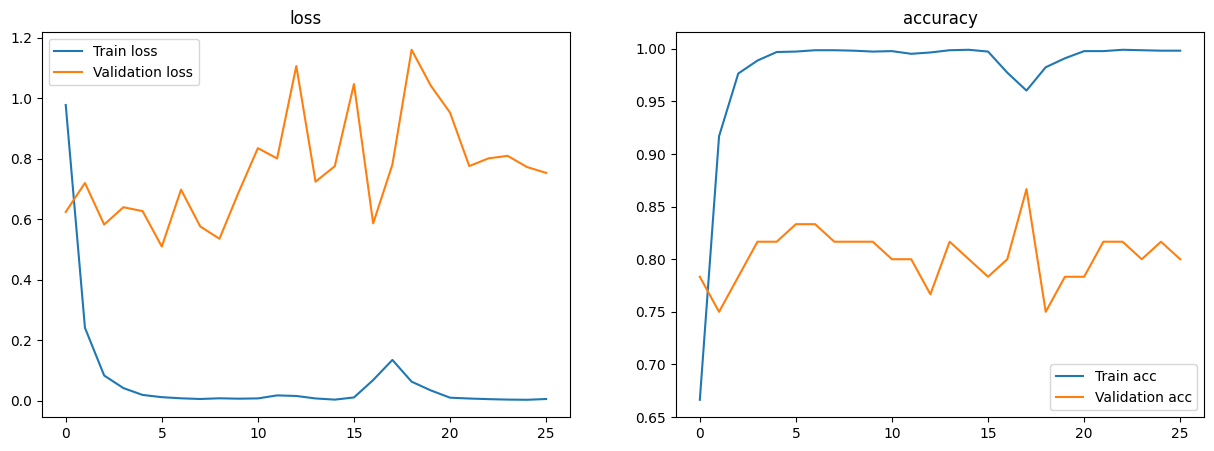

In [92]:
plot_history(history)

In [93]:
custom_resnet50_model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8310 - loss: 0.6605  


[0.6663145422935486, 0.824999988079071]

In [148]:
dir(test_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__annotations__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_adapter',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_copy_trackable_to_cpu',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_

In [172]:
dir(test_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__annotations__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_adapter',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_copy_trackable_to_cpu',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_

In [214]:
predictions = custom_resnet50_model.predict(test_ds)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [215]:
class_dict

{'metal': 0, 'glass': 1, 'paper': 2, 'trash': 3, 'cardboard': 4, 'plastic': 5}

In [216]:
np.argmax(predictions, axis=1)

array([0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 4, 4, 4,
       1, 3, 4, 4, 4, 1, 3, 0, 5, 5])

In [ ]:
THIS IS THE CORRECT ONE

In [232]:
np.array(test_ds.class_names)[np.argmax(predictions, axis=1).astype(np.int32)]

y_pred = np.argmax(predictions,axis=1)




In [219]:
predicted_labels = [list(class_dict.keys())[i] for i in np.argmax(predictions, axis=1)]
predicted_labels

['metal',
 'trash',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'metal',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'glass',
 'paper',
 'glass',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'paper',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'trash',
 'glass',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'glass',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard'

In [220]:
np.array(test_ds.class_names)[np.argmax(list(test_ds)[3][1],axis=1)]

array(['plastic', 'plastic', 'plastic', 'plastic', 'trash', 'trash',
       'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash',
       'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash',
       'trash', 'trash', 'trash', 'trash'], dtype='<U9')

In [221]:
from sklearn.metrics import classification_report, confusion_matrix

In [222]:
list(class_dict.keys())[0]

'metal'

In [225]:
# unbatch the test dataset

unbatched_test_ds = test_ds.unbatch()
labels = np.array(list(unbatched_test_ds.map(lambda x, y: y)))
y_true = np.argmax(labels, axis=1)

In [226]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
true_labels = test_df['label']
true_labels

In [ ]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
true_labels = []
for i in test_ds:
    true_labels.extend(np.array(test_ds.class_names)[np.argmax(i[1],axis=1)])

true_labels

In [ ]:
unbatched_test_ds = test_ds.unbatch()
labels = np.array(list(unbatched_test_ds.map(lambda x, y: y)))
y_true = np.argmax(labels, axis=1)

In [ ]:
def evaluate_model_performance(model, test_ds, class_labels):
        """
    Evaluate the model's performance on the validation set and print the classification report.

    Parameters:
    - model: The trained model.
    - val_generator: Validation data generator.
    - class_labels: List of class names.
    
    Returns:
    - report: Classification report as a string.
    """

 #   # Getting all the true labels for the test set
        true_labels = []
        for i in test_ds:
            true_labels.extend(np.array(test_ds.class_names)[np.argmax(i[1],axis=1)])

    # Get the class labels (names) from the generator
        class_labels = list(class_dict.keys())

    # To get the predicted labels, we predict using the model  
        predictions = model.predict(test_ds)
    
    # Take the argmax to get the predicted class indices.
        predicted_labels = np.array(test_ds.class_names)[np.argmax(predictions, axis=1).astype(np.int32)]

        

    # Classification report
        report = classification_report(y_true, y_pred, target_names=class_labels)
        print(report)
        print('\n')
    
    # Define a custom colormap
        colors = ["white", "royalblue"]
        cmap_cm = LinearSegmentedColormap.from_list("cmap_cm", colors)

    # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)

    # Plotting confusion matrix using seaborn
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, cmap=cmap_cm, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

In [231]:
y_pred

96

In [234]:
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       metal       0.95      0.95      0.95        20
       glass       0.77      1.00      0.87        20
       paper       0.90      0.90      0.90        20
       trash       0.77      1.00      0.87        20
   cardboard       0.75      0.90      0.82        20
     plastic       1.00      0.20      0.33        20

    accuracy                           0.82       120
   macro avg       0.86      0.83      0.79       120
weighted avg       0.86      0.82      0.79       120



In [ ]:
evaluate_model_performance(custom_resnet50_model, test_ds, class_labels)

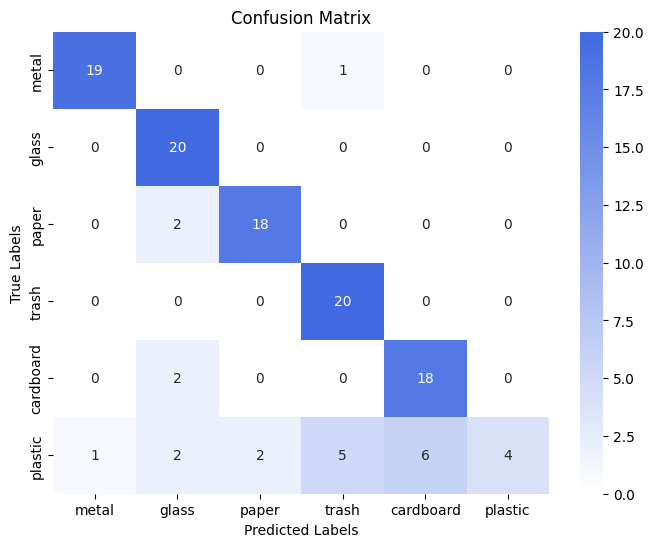

In [238]:
    # Define a custom colormap
colors = ["white", "royalblue"]
cmap_cm = LinearSegmentedColormap.from_list("cmap_cm", colors)
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

    # Plotting confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap=cmap_cm, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();